<a href="https://colab.research.google.com/github/Varshamishra56/PRODIGY_TrackCode_TaskNumber/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"varsha56","key":"267ba0eb98a5a82800215a5468f3ef23"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:09<00:00, 74.4MB/s]
100% 812M/812M [00:09<00:00, 88.8MB/s]


In [ ]:
import zipfile

# Assuming /content/dogs-vs-cats.zip is already in your Google Colab environment
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

# Extract the train and test zip files inside the main directory
with zipfile.ZipFile('/content/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats/train')
with zipfile.ZipFile('/content/dogs-vs-cats/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats/test')

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:

train_dir = '/content/dogs-vs-cats/train'

In [ ]:
filenames = os.listdir(train_dir)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
print(df.shape)

(1, 2)


In [ ]:
import os

train_dir = '/content/dogs-vs-cats/train'
print(os.listdir(train_dir))


['train']


In [ ]:
import os

# Print the contents of the train directory
train_dir = '/content/dogs-vs-cats/train'
print("Train directory contents:", os.listdir(train_dir))

# Print the contents of the test directory
test_dir = '/content/dogs-vs-cats/test'
print("Test directory contents:", os.listdir(test_dir))


Train directory contents: ['train']
Test directory contents: ['test1']


In [47]:
#NEW
import numpy as np
import os
import zipfile
from tqdm import tqdm
from tensorflow.keras.applications import MobileNetV2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import glob # Import the glob module
from tqdm import tqdm # Import the tqdm module for progress bar
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [48]:
train_zip_path = '/content/train/train.zip'
test_zip_path = '/content/train/test1.zip'

In [49]:
# Extract the zip files
def extract_zip(file_path, extract_to='.'):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)


In [50]:
# Extract the train and test datasets
extract_zip(train_zip_path, './train')
extract_zip(test_zip_path, './test')


In [51]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

In [52]:
def extract_features(directory, batch_size=32, max_images=None):
    features = []
    labels = []
    img_paths = []
    # Use glob to recursively find all .jpg files
    # Add a print statement to check the file paths found
    print("Searching for images in:", directory + '/**/*.jpg')
    for img_path in glob.glob(directory + '/**/*.jpg', recursive=True):
        img_paths.append(img_path)
        if max_images and len(img_paths) >= max_images:
            break

    # Print the number of images found
    print("Found {} images.".format(len(img_paths)))

    for i in tqdm(range(0, len(img_paths), batch_size)):
        batch_paths = img_paths[i:i+batch_size]
        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            batch_images.append(img_data)

        batch_images = np.vstack(batch_images)
        features_batch = base_model.predict(batch_images)
        features_batch = features_batch.reshape((features_batch.shape[0], -1))
        features.extend(features_batch)

        for img_path in batch_paths:
            # Check if 'cat' is in the filename, case-insensitive
            if 'cat' in img_path.lower():
                labels.append(0)
            else:
                labels.append(1)
    return np.array(features), np.array(labels).reshape(-1, 1)

In [53]:
train_dir = './train/train'
train_features, train_labels = extract_features(train_dir, batch_size=32, max_images=1000) # Limit to 1000 images for speed


Searching for images in: ./train/train/**/*.jpg
Found 1000 images.


  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 6s 6s/step


  3%|▎         | 1/32 [00:07<03:46,  7.29s/it]

1/1 [==============================] - 3s 3s/step


  6%|▋         | 2/32 [00:10<02:24,  4.82s/it]

1/1 [==============================] - 2s 2s/step


  9%|▉         | 3/32 [00:13<01:55,  3.98s/it]

1/1 [==============================] - 2s 2s/step


 12%|█▎        | 4/32 [00:16<01:37,  3.50s/it]

1/1 [==============================] - 1s 1s/step


 16%|█▌        | 5/32 [00:17<01:14,  2.74s/it]

1/1 [==============================] - 2s 2s/step


 19%|█▉        | 6/32 [00:20<01:10,  2.72s/it]

1/1 [==============================] - 1s 1s/step


 22%|██▏       | 7/32 [00:22<01:08,  2.74s/it]

1/1 [==============================] - 1s 1s/step


 25%|██▌       | 8/32 [00:24<00:54,  2.27s/it]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 9/32 [00:25<00:44,  1.95s/it]

1/1 [==============================] - 1s 1s/step


 31%|███▏      | 10/32 [00:26<00:39,  1.78s/it]

1/1 [==============================] - 1s 1s/step


 34%|███▍      | 11/32 [00:28<00:35,  1.67s/it]

1/1 [==============================] - 1s 1s/step


 38%|███▊      | 12/32 [00:29<00:31,  1.58s/it]

1/1 [==============================] - 1s 1s/step


 41%|████      | 13/32 [00:31<00:29,  1.53s/it]

1/1 [==============================] - 2s 2s/step


 44%|████▍     | 14/32 [00:33<00:30,  1.69s/it]

1/1 [==============================] - 2s 2s/step


 47%|████▋     | 15/32 [00:35<00:34,  2.00s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████     | 16/32 [00:37<00:29,  1.82s/it]

1/1 [==============================] - 1s 1s/step


 53%|█████▎    | 17/32 [00:38<00:25,  1.69s/it]

1/1 [==============================] - 1s 1s/step


 56%|█████▋    | 18/32 [00:40<00:22,  1.60s/it]

1/1 [==============================] - 1s 1s/step


 59%|█████▉    | 19/32 [00:41<00:20,  1.55s/it]

1/1 [==============================] - 1s 1s/step


 62%|██████▎   | 20/32 [00:42<00:18,  1.50s/it]

1/1 [==============================] - 1s 1s/step


 66%|██████▌   | 21/32 [00:44<00:16,  1.48s/it]

1/1 [==============================] - 1s 1s/step


 69%|██████▉   | 22/32 [00:45<00:13,  1.40s/it]

1/1 [==============================] - 2s 2s/step


 72%|███████▏  | 23/32 [00:47<00:13,  1.52s/it]

1/1 [==============================] - 2s 2s/step


 75%|███████▌  | 24/32 [00:49<00:13,  1.64s/it]

1/1 [==============================] - 1s 1s/step


 78%|███████▊  | 25/32 [00:50<00:11,  1.58s/it]

1/1 [==============================] - 1s 1s/step


 81%|████████▏ | 26/32 [00:51<00:08,  1.45s/it]

1/1 [==============================] - 1s 1s/step


 84%|████████▍ | 27/32 [00:53<00:07,  1.44s/it]

1/1 [==============================] - 1s 1s/step


 88%|████████▊ | 28/32 [00:54<00:05,  1.35s/it]

1/1 [==============================] - 1s 1s/step


 91%|█████████ | 29/32 [00:55<00:04,  1.36s/it]

1/1 [==============================] - 1s 1s/step


 94%|█████████▍| 30/32 [00:57<00:02,  1.32s/it]

1/1 [==============================] - 1s 1s/step


 97%|█████████▋| 31/32 [00:58<00:01,  1.35s/it]

1/1 [==============================] - 1s 1s/step


100%|██████████| 32/32 [00:59<00:00,  1.87s/it]


In [54]:
test_dir = './test/test1'
test_features, test_labels = extract_features(test_dir, batch_size=32, max_images=1000) # Limit to 1000 images for speed



Searching for images in: ./test/test1/**/*.jpg
Found 1000 images.


  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  3%|▎         | 1/32 [00:01<00:47,  1.53s/it]

1/1 [==============================] - 2s 2s/step


  6%|▋         | 2/32 [00:04<01:07,  2.24s/it]

1/1 [==============================] - 1s 1s/step


  9%|▉         | 3/32 [00:05<00:51,  1.77s/it]

1/1 [==============================] - 1s 1s/step


 12%|█▎        | 4/32 [00:06<00:43,  1.54s/it]

1/1 [==============================] - 1s 1s/step


 16%|█▌        | 5/32 [00:08<00:40,  1.49s/it]

1/1 [==============================] - 1s 1s/step


 19%|█▉        | 6/32 [00:09<00:37,  1.46s/it]

1/1 [==============================] - 1s 1s/step


 22%|██▏       | 7/32 [00:10<00:34,  1.37s/it]

1/1 [==============================] - 1s 1s/step


 25%|██▌       | 8/32 [00:12<00:33,  1.38s/it]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 9/32 [00:13<00:30,  1.31s/it]

1/1 [==============================] - 1s 1s/step


 31%|███▏      | 10/32 [00:14<00:29,  1.34s/it]

1/1 [==============================] - 2s 2s/step


 34%|███▍      | 11/32 [00:17<00:37,  1.76s/it]

1/1 [==============================] - 1s 1s/step


 38%|███▊      | 12/32 [00:18<00:33,  1.65s/it]

1/1 [==============================] - 1s 1s/step


 41%|████      | 13/32 [00:19<00:28,  1.51s/it]

1/1 [==============================] - 1s 1s/step


 44%|████▍     | 14/32 [00:21<00:25,  1.41s/it]

1/1 [==============================] - 1s 1s/step


 47%|████▋     | 15/32 [00:22<00:22,  1.35s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████     | 16/32 [00:23<00:21,  1.37s/it]

1/1 [==============================] - 1s 1s/step


 53%|█████▎    | 17/32 [00:24<00:19,  1.32s/it]

1/1 [==============================] - 1s 1s/step


 56%|█████▋    | 18/32 [00:26<00:18,  1.34s/it]

1/1 [==============================] - 1s 1s/step


 59%|█████▉    | 19/32 [00:27<00:17,  1.33s/it]

1/1 [==============================] - 2s 2s/step


 62%|██████▎   | 20/32 [00:29<00:18,  1.51s/it]

1/1 [==============================] - 2s 2s/step


 66%|██████▌   | 21/32 [00:32<00:20,  1.89s/it]

1/1 [==============================] - 1s 1s/step


 69%|██████▉   | 22/32 [00:33<00:17,  1.74s/it]

1/1 [==============================] - 1s 1s/step


 72%|███████▏  | 23/32 [00:35<00:14,  1.63s/it]

1/1 [==============================] - 1s 1s/step


 75%|███████▌  | 24/32 [00:36<00:12,  1.50s/it]

1/1 [==============================] - 1s 1s/step


 78%|███████▊  | 25/32 [00:37<00:09,  1.39s/it]

1/1 [==============================] - 1s 1s/step


 81%|████████▏ | 26/32 [00:38<00:07,  1.33s/it]

1/1 [==============================] - 1s 1s/step


 84%|████████▍ | 27/32 [00:40<00:06,  1.35s/it]

1/1 [==============================] - 1s 1s/step


 88%|████████▊ | 28/32 [00:41<00:05,  1.30s/it]

1/1 [==============================] - 2s 2s/step


 91%|█████████ | 29/32 [00:43<00:05,  1.72s/it]

1/1 [==============================] - 1s 1s/step


 94%|█████████▍| 30/32 [00:45<00:03,  1.65s/it]

1/1 [==============================] - 1s 1s/step


 97%|█████████▋| 31/32 [00:46<00:01,  1.52s/it]

1/1 [==============================] - 0s 236ms/step


100%|██████████| 32/32 [00:46<00:00,  1.47s/it]


In [56]:
svm = SVC(kernel='linear')
svm.fit(train_features, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [61]:
predictions = svm.predict(test_features)

In [62]:
# Assuming 'submission.csv' is in the current directory - this is not needed as you will create it in this cell
# sample_submission_path = './submission.csv'
sample_submission = pd.DataFrame({'image_name': range(len(predictions)), 'label': predictions}) # Create a new dataframe using the predictions
sample_submission.to_csv('submission.csv', index=False)
print("Submission file created.")

Submission file created.


In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_labels, predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 51.30%


Validation Accuracy: 51.30%


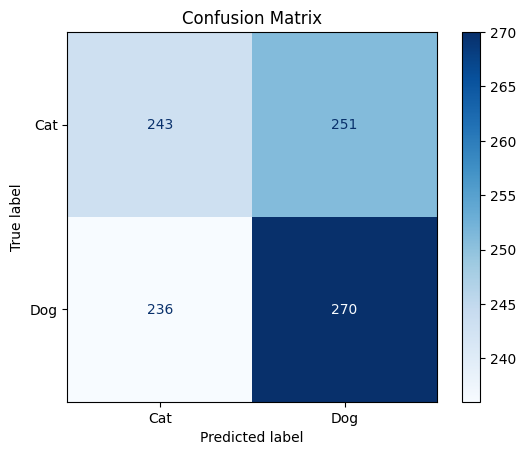

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot validation accuracy
def plot_confusion_matrix(labels, predictions, class_names):
    cm = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Calculate accuracy (for this example, we assume the accuracy is already computed)
accuracy = accuracy_score(train_labels, predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
class_names = ['Cat', 'Dog']
plot_confusion_matrix(train_labels, predictions, class_names)
